In [1]:
from collections import Counter
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# The Data

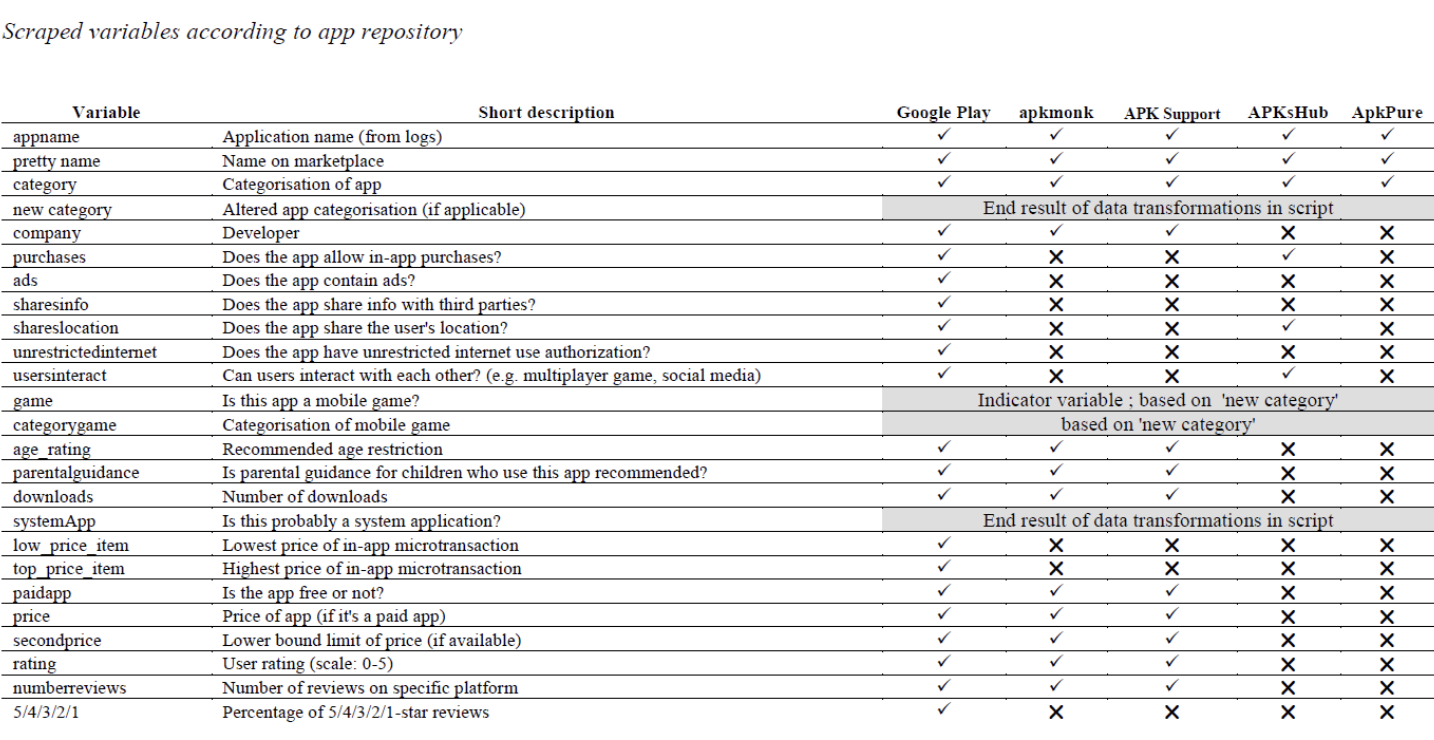

## Data Exploration and Feature Engineering

In [2]:
df = pd.read_csv('./android_apps.csv')
df.head()

/var/folders/_1/wfdz5x1x2f37_s1jvc8855bc0000gp/T/ipykernel_6847/1777179322.py:1: DtypeWarning: Columns (6,7,8,9,10,11,14,21,22,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./android_apps.csv')


,appname,fancyname,category,company,extrainfo,source,purchases,ads,sharesinfo,shareslocation,...,price,secondprice,paidapp,rating,numberreviews,five,four,three,two,one
0,com.netflix.mediaclient,Netflix,entertainment,"netflix, inc.","offers in-app purchases \ august 19, 2019 \ va...",google play,1,0,0,0,...,free,NaN,0,4.5,"7,287,852",100,13,4,2,9
1,com.facebook.orca,Messenger – Text and Video Chat for Free,communication,facebook,"offers in-app purchases \ august 20, 2019 \ va...",google play,1,0,0,1,...,free,NaN,0,4.2,"69,050,158",100,15,9,4,15
2,com.android.chrome,Google Chrome: Fast & Secure,communication,google llc,"august 14, 2019 \ varies with device \ 5,000,0...",google play,0,0,0,0,...,free,NaN,0,4.3,"17,065,648",100,18,9,4,10
3,com.google.android.gm,Gmail,communication,google llc,"contains ads \ august 19, 2019 \ varies with d...",google play,0,1,0,0,...,free,NaN,0,4.4,"6,272,191",100,16,7,3,9
4,com.grindrapp.android,Grindr - Gay chat,social,grindr llc,contains ads·offers in-app purchases \ august ...,google play,1,1,0,0,...,free,NaN,0,3.5,"365,432",100,21,17,12,53


In [3]:
df.shape

(50217, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50217 entries, 0 to 50216
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   appname               50217 non-null  object
 1   fancyname             50214 non-null  object
 2   category              50215 non-null  object
 3   company               50215 non-null  object
 4   extrainfo             50215 non-null  object
 5   source                50217 non-null  object
 6   purchases             50217 non-null  object
 7   ads                   50217 non-null  object
 8   sharesinfo            50217 non-null  object
 9   shareslocation        50217 non-null  object
 10  unrestrictedinternet  50217 non-null  object
 11  usersinteract         50217 non-null  object
 12  game                  50217 non-null  int64 
 13  age_rating            50217 non-null  object
 14  Parentalguidance      50217 non-null  object
 15  Downloads             50217 non-null

In [5]:
df.isna().sum()

appname                     0
fancyname                   3
category                    2
company                     2
extrainfo                   2
source                      0
purchases                   0
ads                         0
sharesinfo                  0
shareslocation              0
unrestrictedinternet        0
usersinteract               0
game                        0
age_rating                  0
Parentalguidance            0
Downloads                   0
FuzzyMatched                0
basename                    0
SystemApp                   0
New.category                0
categorygame                0
low_price_item          33891
top_price_item          33891
price                     318
secondprice             46540
paidapp                   318
rating                    318
numberreviews             318
five                      318
four                      318
three                     318
two                       318
one                       318
dtype: int

In [6]:
# remove columns with too many na / null
df_null_filter = df.iloc[:, [df[col].isna().sum() < 4 for col in df.columns]]
df_null_filter.isna().sum()

appname                 0
fancyname               3
category                2
company                 2
extrainfo               2
source                  0
purchases               0
ads                     0
sharesinfo              0
shareslocation          0
unrestrictedinternet    0
usersinteract           0
game                    0
age_rating              0
Parentalguidance        0
Downloads               0
FuzzyMatched            0
basename                0
SystemApp               0
New.category            0
categorygame            0
dtype: int64

In [7]:
# discover features that have an excessive number of unique values
pd.DataFrame({
    'feature': df_null_filter.columns,
    'unique': [len(df_null_filter[col].unique()) for col in df_null_filter.columns]
})

,feature,unique
0,appname,50217
1,fancyname,45834
2,category,52
3,company,31047
4,extrainfo,46566
5,source,8
6,purchases,6
7,ads,6
8,sharesinfo,6
9,shareslocation,6


In [8]:
# remove columns with too many unique values
df_unique_filter = df_null_filter.iloc[:, [len(df_null_filter[col].unique()) < 53 for col in df_null_filter.columns]]
pd.DataFrame({
    'feature': df_unique_filter.columns,
    'unique': [len(df_unique_filter[col].unique()) for col in df_unique_filter.columns],
    'na count': df_unique_filter.isna().sum()
})

,feature,unique,na count
category,category,52,2
source,source,8,0
purchases,purchases,6,0
ads,ads,6,0
sharesinfo,sharesinfo,6,0
shareslocation,shareslocation,6,0
unrestrictedinternet,unrestrictedinternet,6,0
usersinteract,usersinteract,6,0
game,game,2,0
age_rating,age_rating,7,0


In [9]:
# drop two null rows of category
df_unique_filter = df_unique_filter[df_unique_filter['category'].notna()]
pd.DataFrame({
    'feature': df_unique_filter.columns,
    'unique': [len(df_unique_filter[col].unique()) for col in df_unique_filter.columns],
    'na count': df_unique_filter.isna().sum()
})

,feature,unique,na count
category,category,51,0
source,source,8,0
purchases,purchases,6,0
ads,ads,6,0
sharesinfo,sharesinfo,6,0
shareslocation,shareslocation,6,0
unrestrictedinternet,unrestrictedinternet,6,0
usersinteract,usersinteract,6,0
game,game,2,0
age_rating,age_rating,7,0


## The Goal

The goal of this project is to train a model that will be able to identify a successful app.

Successful in this case refers to apps that meet a download *threshold*.

Further exploration is done on the __Downloads__ field in order to define the *threshold*.

The __Downloads__ field will converted as such:
> __0__ : unsuccessful (does not meet Downloads threshold)
    
> __1__ : successful (meets Downloads threshold)

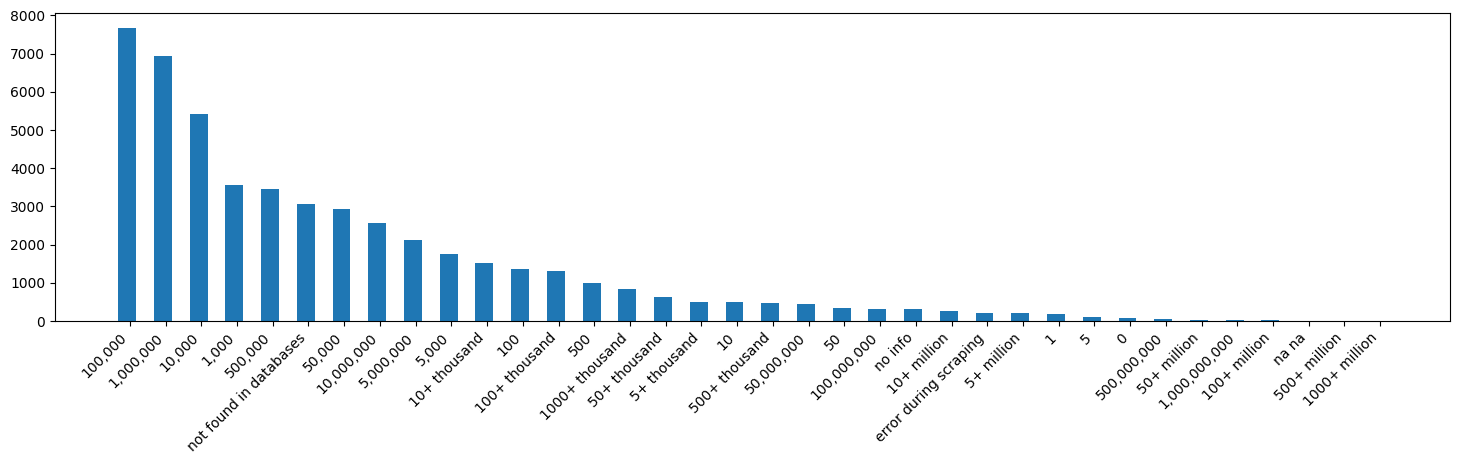

In [10]:
field = 'Downloads'
field_values = df_unique_filter[field].value_counts()
field_names = field_values.index
max_field_values = max(field_values)

fig = plt.figure(figsize=(18,4))
ax = plt.subplot(111)
width=1.0

bar = ax.bar(range(len(field_names)), field_values, width=width/2)

ax.set_xticks(np.arange(0, len(field_names)) + width/2)
ax.set_xticklabels(field_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in bar]

locs, labels = plt.xticks()
_ = plt.xticks(xticks_pos, field_names,  ha='right', rotation=45)

plt.show()

In [11]:
# convert Downloads to numeric field
numeric_downloads = df_unique_filter['Downloads'].copy()
for i in numeric_downloads.index:
    value = numeric_downloads[i]
    value=''.join(value.split())
    if value.replace(',', '').isdigit():
        numeric_downloads[i] = int(value.replace(',', ''))
    elif value == '10+thousand':
        numeric_downloads[i] = 10_000
    elif value == '100+thousand':
        numeric_downloads[i] = 100_000
    elif value == '1000+thousand':
        numeric_downloads[i] = 1_000_000
    elif value == '50+thousand':
        numeric_downloads[i] = 50_000
    elif value == '5+thousand':
        numeric_downloads[i] = 5_000
    elif value == '500+thousand':
        numeric_downloads[i] = 500_000
    elif value == '10+million':
        numeric_downloads[i] = 10_000_000
    elif value == '5+million':
        numeric_downloads[i] = 5_000_000
    elif value == '50+million':
        numeric_downloads[i] = 50_000_000
    elif value == '100+million':
        numeric_downloads[i] = 100_000_000
    elif value == '500+million':
        numeric_downloads[i] = 500_000_000
    elif value == '1000+million':
        numeric_downloads[i] = 1_000_000_000
    else:
        numeric_downloads[i] = -1
        
df_unique_filter['Downloads'] = numeric_downloads

In [12]:
# explore numeric Download values
df_unique_filter['Downloads'].value_counts()

 100000        8997
 1000000       7770
 10000         6936
 500000        3925
-1             3594
 1000          3558
 50000         3551
 10000000      2833
 5000000       2330
 5000          2242
 100           1351
 500            998
 10             486
 50000000       472
 100000000      353
 50             335
 1              194
 5              116
 0               83
 500000000       53
 1000000000      38
Name: Downloads, dtype: int64

In [13]:
# entries with -1 are not compatible with the goal of this experiment and will be dropped
df_unique_filter.drop(df_unique_filter[df_unique_filter['Downloads'] == -1].index, inplace=True)

df_unique_filter['Downloads'].value_counts()

100000        8997
1000000       7770
10000         6936
500000        3925
1000          3558
50000         3551
10000000      2833
5000000       2330
5000          2242
100           1351
500            998
10             486
50000000       472
100000000      353
50             335
1              194
5              116
0               83
500000000       53
1000000000      38
Name: Downloads, dtype: int64

In [14]:
df_unique_filter.shape

(46621, 16)

<Figure size 1500x500 with 0 Axes>

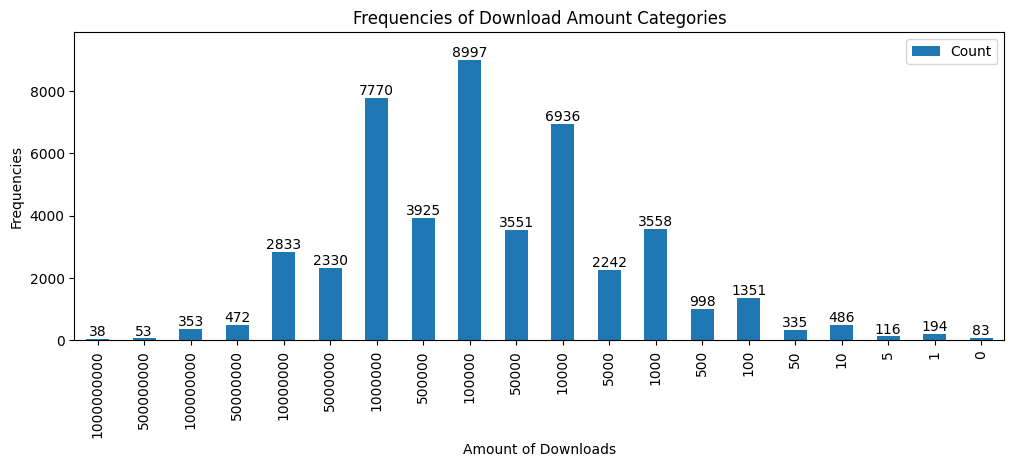

In [15]:
sorted_downloads = df_unique_filter['Downloads'].sort_values()
lst = sorted_downloads.value_counts().sort_index(ascending=False)
lst_df = pd.DataFrame(
    {
        'Amount': lst.keys(),
        'Count': lst
    }
).set_index(['Amount']) # ref: https://www.statology.org/pandas-use-first-column-as-index/

    
plt.figure(figsize=(15,5))
ax = lst_df.plot(
    kind='bar',
    xlabel='Amount of Downloads',
    ylabel='Frequencies',
    title='Frequencies of Download Amount Categories'
)

# ref: https://stackoverflow.com/questions/32884796/matplotlib-padding-between-plot-and-axis
ax.figure.set_size_inches(12, 4)
# ax.grid(True)
ax.margins(0.1)

# ref: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
# ref: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html
for rect, label in zip(ax.patches, lst):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

In [16]:
df_unique_filter['Downloads'].astype('float').describe().apply(lambda x: format(x, 'f'))

count         46621.000000
mean        3738112.320285
std        34552648.562205
min               0.000000
25%           10000.000000
50%          100000.000000
75%         1000000.000000
max      1000000000.000000
Name: Downloads, dtype: object

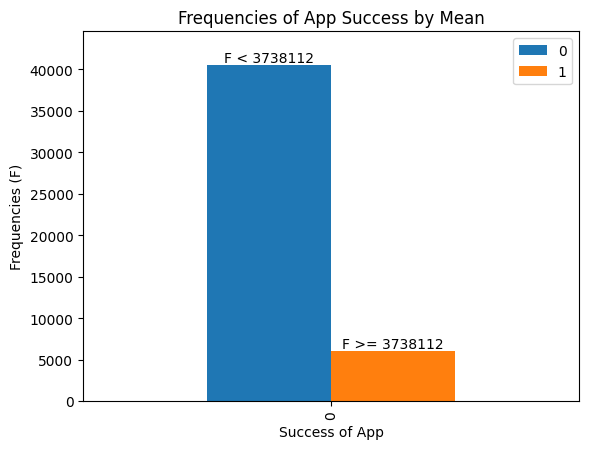

In [17]:
# using the mean as the threshold for successful / unsuccessful and viewing distribution
download_mean = df_unique_filter['Downloads'].mean()
binary_download_encoding = [0 if x < download_mean else 1 for x in df_unique_filter['Downloads'].sort_values()]
ax = pd.DataFrame(
    Counter(binary_download_encoding),
    index=[0]
).plot(
    kind='bar',
    xlabel='Success of App',
    ylabel='Frequencies (F)',
    title='Frequencies of App Success by Mean'
)

ax.margins(0.1)

label = [
    f'F < {int(download_mean)}',
    f'F >= {int(download_mean)}'
]
for rect, label in zip(ax.patches, label):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

_The result is not evenly distributed, so a different property must be used to define the threshold_

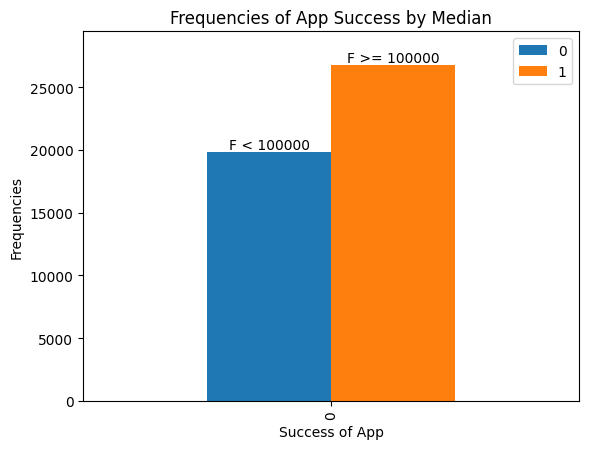

In [18]:
# using the median as the threshold for successful / unsuccessful and viewing distribution
download_median = df_unique_filter['Downloads'].median()
binary_download_encoding = [0 if x < download_median else 1 for x in df_unique_filter['Downloads'].sort_values()]
ax = pd.DataFrame(
    Counter(binary_download_encoding),
    index=[0]
).plot(
    kind='bar',
    xlabel='Success of App',
    ylabel='Frequencies',
    title='Frequencies of App Success by Median'
)

ax.margins(0.1)

label = [
    f'F < {int(download_median)}',
    f'F >= {int(download_median)}'
]
for rect, label in zip(ax.patches, label):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

_The result is more evenly distributed; median will be used to define the threshold_

In [19]:
df_unique_filter.sort_values(by=['age_rating']).head(10)

,category,source,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,Downloads,FuzzyMatched,SystemApp,New.category,categorygame
8262,role playing,google play,0,0,0,0,0,0,1,12,0,1000,0,0,mobilegame,role playing
2021,personalization,google play,0,1,0,0,0,0,0,12,0,10000000,0,0,personalization,no game
44612,music & audio,apkmonk,no info,no info,no info,no info,no info,no info,0,12,0,100000,0,0,music & audio,no game
44614,social,apkmonk,no info,no info,no info,no info,no info,no info,0,12,0,100000,0,0,social,no game
2024,action,google play,1,1,0,0,0,1,1,12,0,50000000,0,0,mobilegame,action
44617,social,apkmonk,no info,no info,no info,no info,no info,no info,0,12,0,10000,0,0,social,no game
38617,simulation,google play,0,1,0,0,0,0,1,12,0,1000000,0,0,mobilegame,simulation
22175,card,google play,1,0,0,0,0,0,1,12,0,10000,0,0,mobilegame,card
44620,personalization,apkmonk,no info,no info,no info,no info,no info,no info,0,12,0,50,0,0,personalization,no game
36798,casino,google play,0,0,0,0,0,0,1,12,0,10000,0,0,mobilegame,casino


In [20]:
# create column w/ success/unsuccessful downloads (target) encoding and drop old Downloads feature
df_binary_downloads = df_unique_filter.copy()
df_binary_downloads['successful'] = [0 if x < download_median else 1 for x in df_unique_filter['Downloads']]

df_binary_downloads.drop(columns=['Downloads'], inplace=True)
df_binary_downloads.sort_values(by=['age_rating']).head(10)

,category,source,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,FuzzyMatched,SystemApp,New.category,categorygame,successful
8262,role playing,google play,0,0,0,0,0,0,1,12,0,0,0,mobilegame,role playing,0
2021,personalization,google play,0,1,0,0,0,0,0,12,0,0,0,personalization,no game,1
44612,music & audio,apkmonk,no info,no info,no info,no info,no info,no info,0,12,0,0,0,music & audio,no game,1
44614,social,apkmonk,no info,no info,no info,no info,no info,no info,0,12,0,0,0,social,no game,1
2024,action,google play,1,1,0,0,0,1,1,12,0,0,0,mobilegame,action,1
44617,social,apkmonk,no info,no info,no info,no info,no info,no info,0,12,0,0,0,social,no game,0
38617,simulation,google play,0,1,0,0,0,0,1,12,0,0,0,mobilegame,simulation,1
22175,card,google play,1,0,0,0,0,0,1,12,0,0,0,mobilegame,card,0
44620,personalization,apkmonk,no info,no info,no info,no info,no info,no info,0,12,0,0,0,personalization,no game,0
36798,casino,google play,0,0,0,0,0,0,1,12,0,0,0,mobilegame,casino,0


## Encoding

Non-numerical features will be encoded to explore correlation and meet the requirements of some of the models that will be used.

In [21]:
# identify types of features
df_binary_downloads.dtypes

category                object
source                  object
purchases               object
ads                     object
sharesinfo              object
shareslocation          object
unrestrictedinternet    object
usersinteract           object
game                     int64
age_rating              object
Parentalguidance        object
FuzzyMatched             int64
SystemApp                int64
New.category            object
categorygame            object
successful               int64
dtype: object

In [22]:
# convert object types to categories
for col in df_binary_downloads:
    if df_binary_downloads[col].dtype == 'object':
        df_binary_downloads[col] = pd.Categorical(df_binary_downloads[col])
        
df_binary_downloads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46621 entries, 0 to 50216
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   category              46621 non-null  category
 1   source                46621 non-null  category
 2   purchases             46621 non-null  category
 3   ads                   46621 non-null  category
 4   sharesinfo            46621 non-null  category
 5   shareslocation        46621 non-null  category
 6   unrestrictedinternet  46621 non-null  category
 7   usersinteract         46621 non-null  category
 8   game                  46621 non-null  int64   
 9   age_rating            46621 non-null  category
 10  Parentalguidance      46621 non-null  category
 11  FuzzyMatched          46621 non-null  int64   
 12  SystemApp             46621 non-null  int64   
 13  New.category          46621 non-null  category
 14  categorygame          46621 non-null  category
 15  su

In [23]:
df_coded = df_binary_downloads.copy()

# convert category types to integer code representation
for col in df_coded:
    if df_coded[col].dtype == 'category':
        df_coded[col] = df_coded[col].cat.codes
        
df_coded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46621 entries, 0 to 50216
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   category              46621 non-null  int8 
 1   source                46621 non-null  int8 
 2   purchases             46621 non-null  int8 
 3   ads                   46621 non-null  int8 
 4   sharesinfo            46621 non-null  int8 
 5   shareslocation        46621 non-null  int8 
 6   unrestrictedinternet  46621 non-null  int8 
 7   usersinteract         46621 non-null  int8 
 8   game                  46621 non-null  int64
 9   age_rating            46621 non-null  int8 
 10  Parentalguidance      46621 non-null  int8 
 11  FuzzyMatched          46621 non-null  int64
 12  SystemApp             46621 non-null  int64
 13  New.category          46621 non-null  int8 
 14  categorygame          46621 non-null  int8 
 15  successful            46621 non-null  int64
dtypes: i

In [24]:
df_coded.head()

,category,source,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,FuzzyMatched,SystemApp,New.category,categorygame,successful
0,17,3,1,0,0,0,0,0,0,5,1,0,0,10,9,1
1,13,3,1,0,0,1,0,1,0,4,0,0,0,6,9,1
2,13,3,0,0,0,0,1,0,0,4,0,0,0,16,9,1
3,13,3,0,1,0,0,0,1,0,4,0,0,0,19,9,1
4,39,3,1,1,0,0,0,1,0,2,0,0,0,7,9,1


In [25]:
corr_matrix = df_coded.corr()
corr_matrix

,category,source,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,FuzzyMatched,SystemApp,New.category,categorygame,successful
category,1.000000,0.004366,-0.020650,-0.014243,-0.006294,-0.005212,-0.006056,-0.010339,-0.181696,0.119797,-0.006671,0.001813,NaN,0.764567,0.614141,0.003421
source,0.004366,1.000000,-0.663091,-0.635296,-0.727334,-0.725454,-0.730256,-0.699953,-0.001756,0.041082,-0.263293,0.006695,NaN,-0.012897,0.024251,0.153876
purchases,-0.020650,-0.663091,1.000000,0.927512,0.941791,0.942364,0.944870,0.927747,0.079924,-0.053298,0.752994,0.021820,NaN,-0.004165,-0.019397,-0.167193
ads,-0.014243,-0.635296,0.927512,1.000000,0.933241,0.932712,0.937480,0.910869,0.071465,-0.047258,0.767612,0.017519,NaN,0.005822,-0.023667,-0.143591
sharesinfo,-0.006294,-0.727334,0.941791,0.933241,1.000000,0.990854,0.993252,0.970069,-0.026938,-0.007453,0.763327,0.022905,NaN,-0.003330,-0.012706,-0.259698
shareslocation,-0.005212,-0.725454,0.942364,0.932712,0.990854,1.000000,0.992997,0.972721,-0.030236,-0.007542,0.765756,0.023701,NaN,-0.002423,-0.013245,-0.261969
unrestrictedinternet,-0.006056,-0.730256,0.944870,0.937480,0.993252,0.992997,1.000000,0.971010,-0.027472,-0.007489,0.764895,0.023100,NaN,-0.002844,-0.012942,-0.261215
usersinteract,-0.010339,-0.699953,0.927747,0.910869,0.970069,0.972721,0.971010,1.000000,-0.031192,-0.010234,0.766513,0.024526,NaN,-0.012103,-0.007722,-0.249155
game,-0.181696,-0.001756,0.079924,0.071465,-0.026938,-0.030236,-0.027472,-0.031192,1.000000,-0.260282,-0.033430,-0.014940,NaN,0.001440,-0.152226,0.224080
age_rating,0.119797,0.041082,-0.053298,-0.047258,-0.007453,-0.007542,-0.007489,-0.010234,-0.260282,1.000000,-0.000290,0.007288,NaN,0.047328,0.106034,-0.109754


<Axes: >

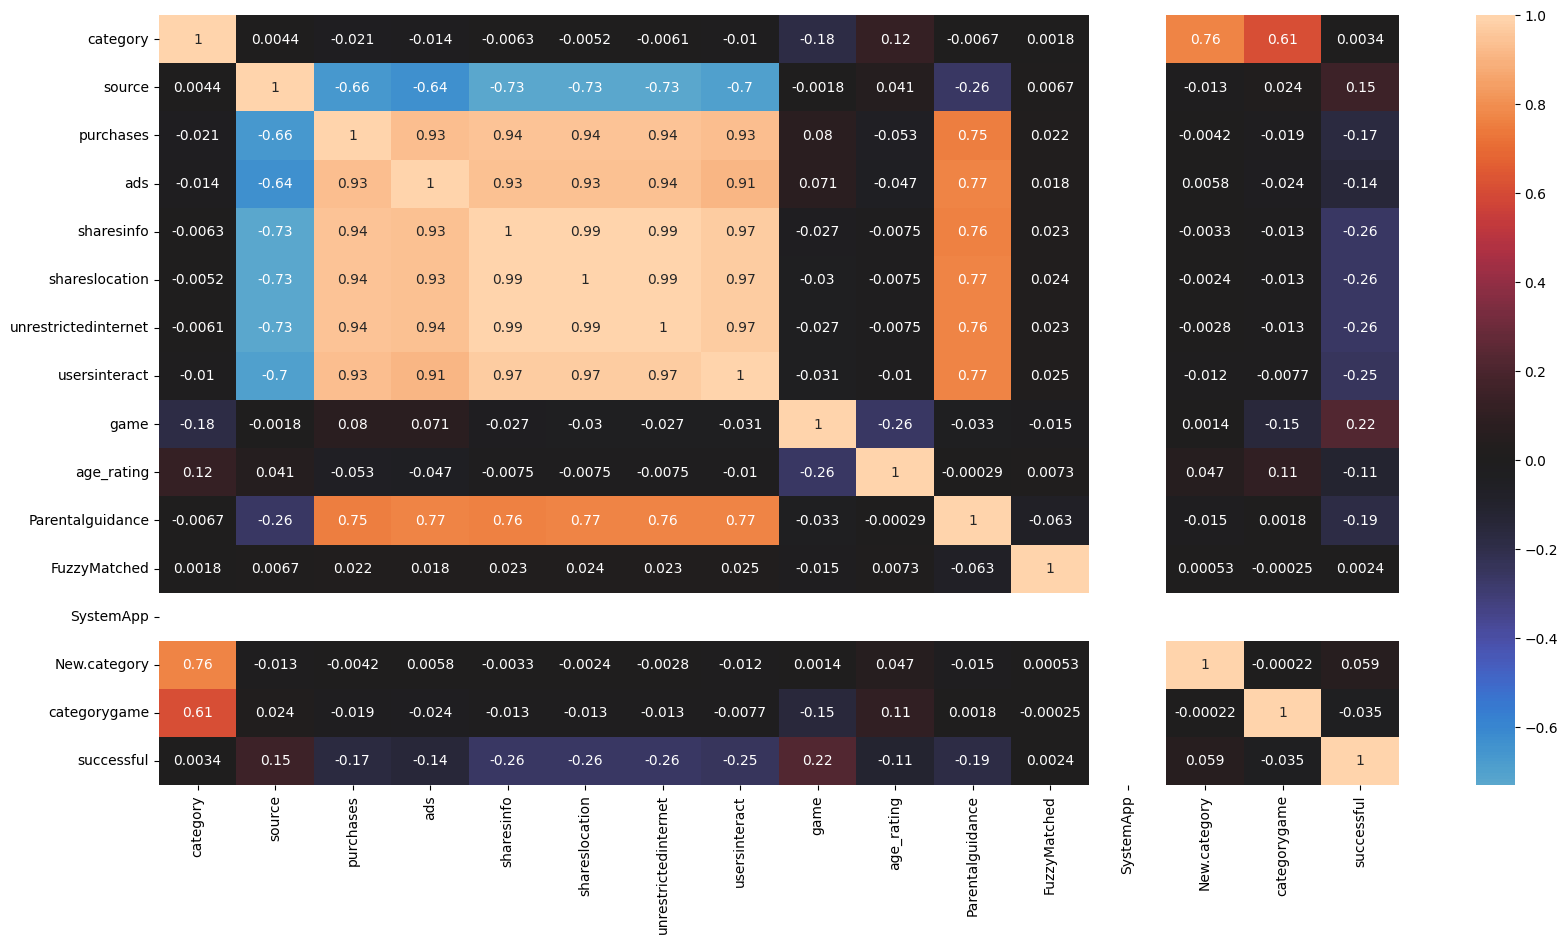

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data=corr_matrix, annot=True, center=0)

<Axes: >

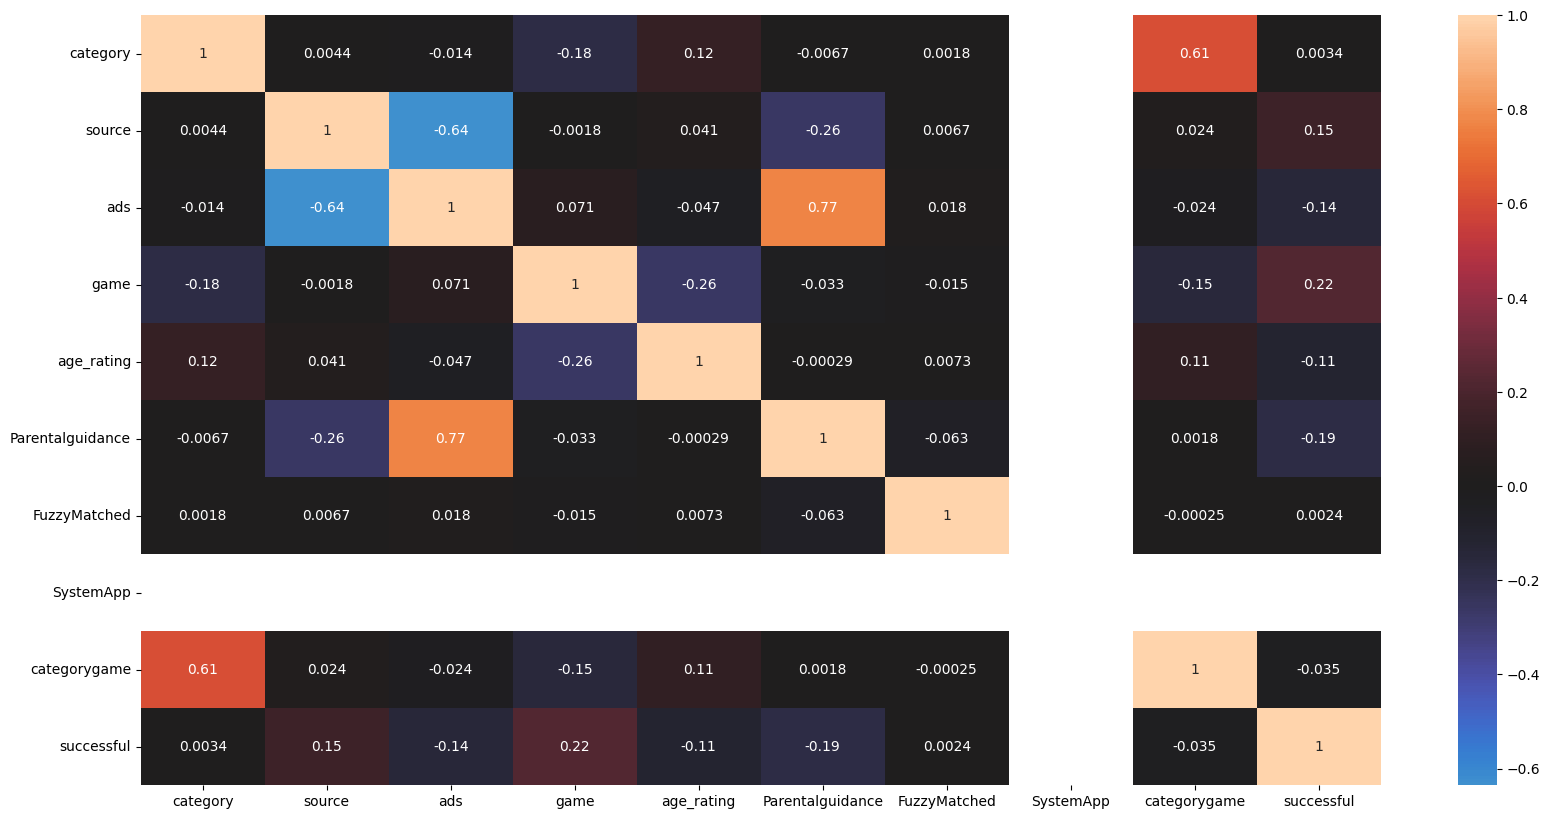

In [27]:
# try heatmap again w/o features that tend to have high correlation
high_corr_cols = ['purchases','usersinteract','sharesinfo','shareslocation','New.category','unrestrictedinternet']

plt.figure(figsize=(20,10))
sns.heatmap(data=df_coded.drop(columns=high_corr_cols).corr(), annot=True, center=0)

<Axes: >

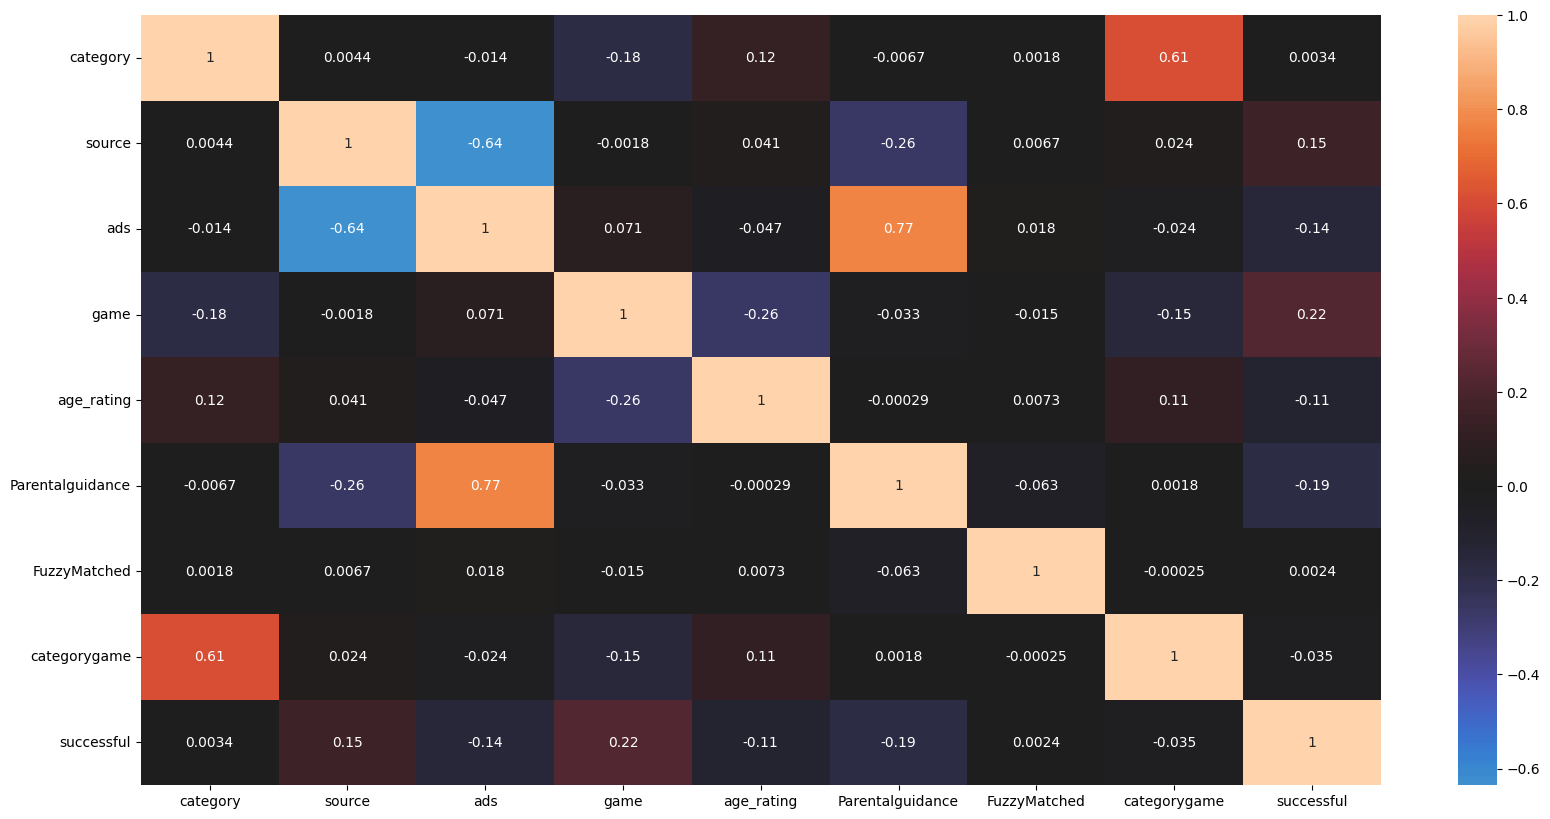

In [28]:
# not sure why SystemApp is returning 'NaN' for corr; decided to drop it
df_independent = df_coded.drop(columns=high_corr_cols).drop(columns=['SystemApp'])

plt.figure(figsize=(20,10))
sns.heatmap(data=df_independent.corr(), annot=True, center=0)

In [29]:
# move forward w/o the high_corr and problem features
df = df_independent.copy()
df.head()

,category,source,ads,game,age_rating,Parentalguidance,FuzzyMatched,categorygame,successful
0,17,3,0,0,5,1,0,9,1
1,13,3,0,0,4,0,0,9,1
2,13,3,0,0,4,0,0,9,1
3,13,3,1,0,4,0,0,9,1
4,39,3,1,0,2,0,0,9,1


In [30]:
df.shape

(46621, 9)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46621 entries, 0 to 50216
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   category          46621 non-null  int8 
 1   source            46621 non-null  int8 
 2   ads               46621 non-null  int8 
 3   game              46621 non-null  int64
 4   age_rating        46621 non-null  int8 
 5   Parentalguidance  46621 non-null  int8 
 6   FuzzyMatched      46621 non-null  int64
 7   categorygame      46621 non-null  int8 
 8   successful        46621 non-null  int64
dtypes: int64(3), int8(6)
memory usage: 1.7 MB


# Training

The goal of this project is to train a classifier that will be able to predict the target: successful

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['successful']),
    df['successful'],
    test_size=0.20,
    random_state=0
)

print(f'Shapes: df {df.shape}\n\tX_train: {X_train.shape},\n\tX_test: {X_test.shape},\n\ty_train: {y_train.shape},\n\ty_test: {y_test.shape}')

Shapes: df (46621, 9)
	X_train: (37296, 8),
	X_test: (9325, 8),
	y_train: (37296,),
	y_test: (9325,)


### Classification Algorithms That Will Be Used:

- __Logistic Regression__

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg_clf = LogisticRegression(random_state=0)
log_reg_clf.fit(X_train, y_train)

ypred = log_reg_clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

accuracy: 0.6368900804289545


/Users/campovo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- __Naive Bayes__

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gaus_nb_clf = GaussianNB()
gaus_nb_clf.fit(X_train, y_train)

ypred = gaus_nb_clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

accuracy: 0.6432171581769437


- __K-Nearest Neighbors__

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

ypred = knn_clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

accuracy: 0.6588739946380697


- __Decision Tree__

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
decision_tree_clf = DecisionTreeClassifier(random_state=0)
decision_tree_clf.fit(X_train, y_train)

ypred = decision_tree_clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

accuracy: 0.7097050938337801


- __Random Forest__

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
random_forest_clf = RandomForestClassifier(random_state=0)
random_forest_clf.fit(X_train, y_train)

ypred = random_forest_clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

accuracy: 0.709597855227882


- __Support Vector Machine (SVM)__

In [43]:
from sklearn.svm import SVC

In [44]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

ypred = svm_clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

accuracy: 0.634745308310992


## Grid Search for Better Results

In [45]:
from sklearn.model_selection import GridSearchCV

### Logistic Regrssion

In [46]:
clf = LogisticRegression(random_state=0)
param_grid = {
    'fit_intercept': [True, False],
    'max_iter': [200, 300, 400, 500]
}

fitmodel = GridSearchCV(
    clf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)
fitmodel.fit(X_train, y_train)
print(f"Logistic Regression:\nbest params = {fitmodel.best_params_}\nbest score = {fitmodel.best_score_}")

clf = LogisticRegression(
    fit_intercept=fitmodel.best_params_['fit_intercept'],
    max_iter=fitmodel.best_params_['max_iter'],
    random_state=0
)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

Logistic Regression:
best params = {'fit_intercept': True, 'max_iter': 200}
best score = 0.6485145354030092
accuracy: 0.6369973190348526


### K-Nearest Neighbors

In [47]:
clf = KNeighborsClassifier(n_neighbors=3)
param_grid = {
    'n_neighbors': [3,4,5,6],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30,40,50]
}

fitmodel = GridSearchCV(
    clf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)
fitmodel.fit(X_train, y_train)
print(f"K-Nearest Neighbors:\nbest params = {fitmodel.best_params_}\nbest score = {fitmodel.best_score_}")

clf = KNeighborsClassifier(
    n_neighbors=fitmodel.best_params_['n_neighbors'],
    weights=fitmodel.best_params_['weights'],
    leaf_size=fitmodel.best_params_['leaf_size']
)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

K-Nearest Neighbors:
best params = {'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}
best score = 0.6728872510205028
accuracy: 0.6709919571045576


### Decision Tree

In [48]:
clf = DecisionTreeClassifier(random_state=0)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2,4,6]
}

fitmodel = GridSearchCV(
    clf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)
fitmodel.fit(X_train, y_train)
print(f"Decision Tree:\nbest params = {fitmodel.best_params_}\nbest score = {fitmodel.best_score_}")

clf = DecisionTreeClassifier(
    criterion=fitmodel.best_params_['criterion'],
    splitter=fitmodel.best_params_['splitter'],
    min_samples_split=fitmodel.best_params_['min_samples_split'],
    random_state=0
)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

Decision Tree:
best params = {'criterion': 'entropy', 'min_samples_split': 4, 'splitter': 'random'}
best score = 0.7073679672288942
accuracy: 0.7099195710455765


### Random Forest

In [49]:
clf = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,4,6]
}

fitmodel = GridSearchCV(
    clf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)
fitmodel.fit(X_train, y_train)
print(f"Random Forest:\nbest params = {fitmodel.best_params_}\nbest score = {fitmodel.best_score_}")

clf = RandomForestClassifier(
    n_estimators=fitmodel.best_params_['n_estimators'],
    criterion=fitmodel.best_params_['criterion'],
    min_samples_split=fitmodel.best_params_['min_samples_split'],
    random_state=0
)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

Random Forest:
best params = {'criterion': 'entropy', 'min_samples_split': 6, 'n_estimators': 100}
best score = 0.7083064164528375
accuracy: 0.7101340482573727


### SVM

In [50]:
clf = SVC(kernel='linear')
param_grid = {
    'kernel': ['linear','poly','rbf','sigmoid']
}

fitmodel = GridSearchCV(
    clf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)
fitmodel.fit(X_train, y_train)
print(f"Support Vector Machine (SVM):\nbest params = {fitmodel.best_params_}\nbest score = {fitmodel.best_score_}")

clf = SVC(
    kernel=fitmodel.best_params_['kernel']
)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(f'accuracy: {accuracy_score(ypred, y_test)}')

Support Vector Machine (SVM):
best params = {'kernel': 'linear'}
best score = 0.6302820063352583
accuracy: 0.634745308310992


# Conclusion

According to the accuracy score alone,

the best machine learning alogrithm for this experiment is

__Random Forest__ with an accuracy score of ~71%